# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [4]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [23]:
df_tesla.shape

(124, 3)

In [24]:
df_tesla.head(-1)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
118,2020-04-01,13,156.376007
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008


In [12]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [15]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [25]:
df_unemployment.shape

(181, 3)

In [26]:
df_unemployment.head(-1)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6
...,...,...,...
175,2018-08,14,3.8
176,2018-09,14,3.7
177,2018-10,15,3.8
178,2018-11,16,3.7


In [29]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [18]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [30]:
df_btc_price.shape

(2204, 3)

In [31]:
df_btc_price.head(-1)

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2198,2020-09-23,10225.864258,2.298673e+10
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10


In [32]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [33]:
df_btc_search.shape

(73, 2)

In [34]:
df_btc_search.head(-1)

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
67,2020-04,15
68,2020-05,22
69,2020-06,13
70,2020-07,14


In [35]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [20]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [41]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [42]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [49]:
print(f'Number of missing values: {df_btc_price.isna().sum()}')

Number of missing values: DATE      0
CLOSE     1
VOLUME    1
dtype: int64


**Challenge**: Remove any missing values that you found.

In [53]:
df_btc_price.dropna(inplace=True)
print(f'Number of missing values: {df_btc_price.isna().sum()}')

Number of missing values: DATE      0
CLOSE     0
VOLUME    0
dtype: int64


### Convert Strings to DateTime Objects

In [60]:
df_tesla.MONTH=pd.to_datetime(df_tesla.MONTH)
df_tesla.MONTH

,MONTH
0,2010-06-01
1,2010-07-01
2,2010-08-01
3,2010-09-01
4,2010-10-01
...,...
119,2020-05-01
120,2020-06-01
121,2020-07-01
122,2020-08-01


In [62]:
df_unemployment.MONTH=pd.to_datetime(df_unemployment.MONTH)
df_unemployment.MONTH

,MONTH
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01
...,...
176,2018-09-01
177,2018-10-01
178,2018-11-01
179,2018-12-01


In [63]:
df_btc_search.MONTH=pd.to_datetime(df_btc_search.MONTH)
df_btc_search.MONTH

,MONTH
0,2014-09-01
1,2014-10-01
2,2014-11-01
3,2014-12-01
4,2015-01-01
...,...
68,2020-05-01
69,2020-06-01
70,2020-07-01
71,2020-08-01


In [65]:
df_btc_price.DATE=pd.to_datetime(df_btc_price.DATE)
df_btc_price.DATE

,DATE
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21
...,...
2199,2020-09-24
2200,2020-09-25
2201,2020-09-26
2202,2020-09-27


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [68]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()
df_btc_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


# Data Visualisation

### Tesla Stock Price v.s. Search Volume

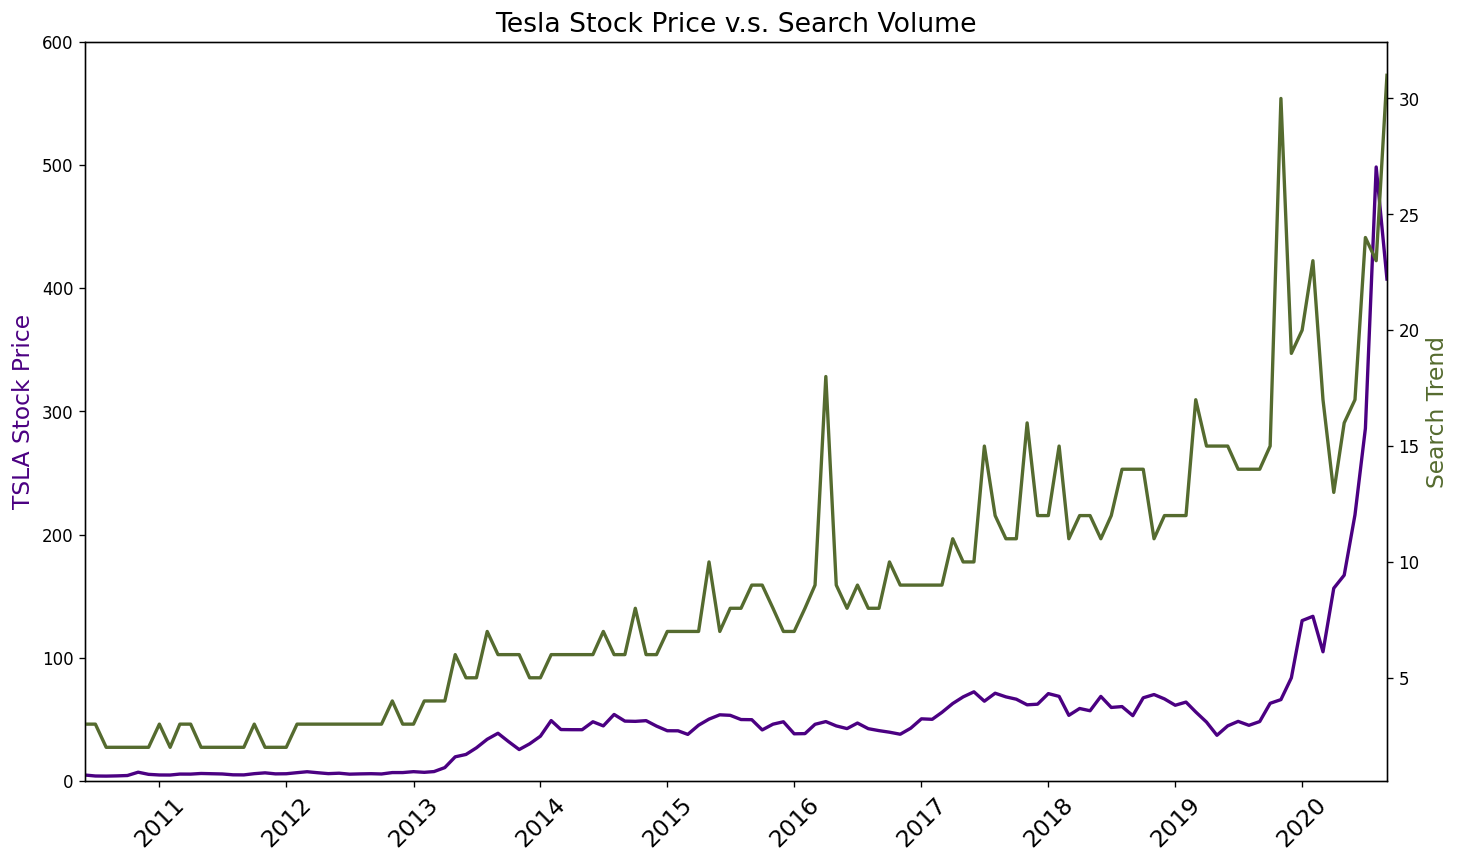

In [105]:
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Tesla Stock Price v.s. Search Volume',fontsize=16)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price',color='indigo',fontsize=14)
ax2.set_ylabel('Search Trend',color="darkolivegreen",fontsize=14)
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE,color='indigo',linewidth=2)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH,color="darkolivegreen",linewidth=2)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

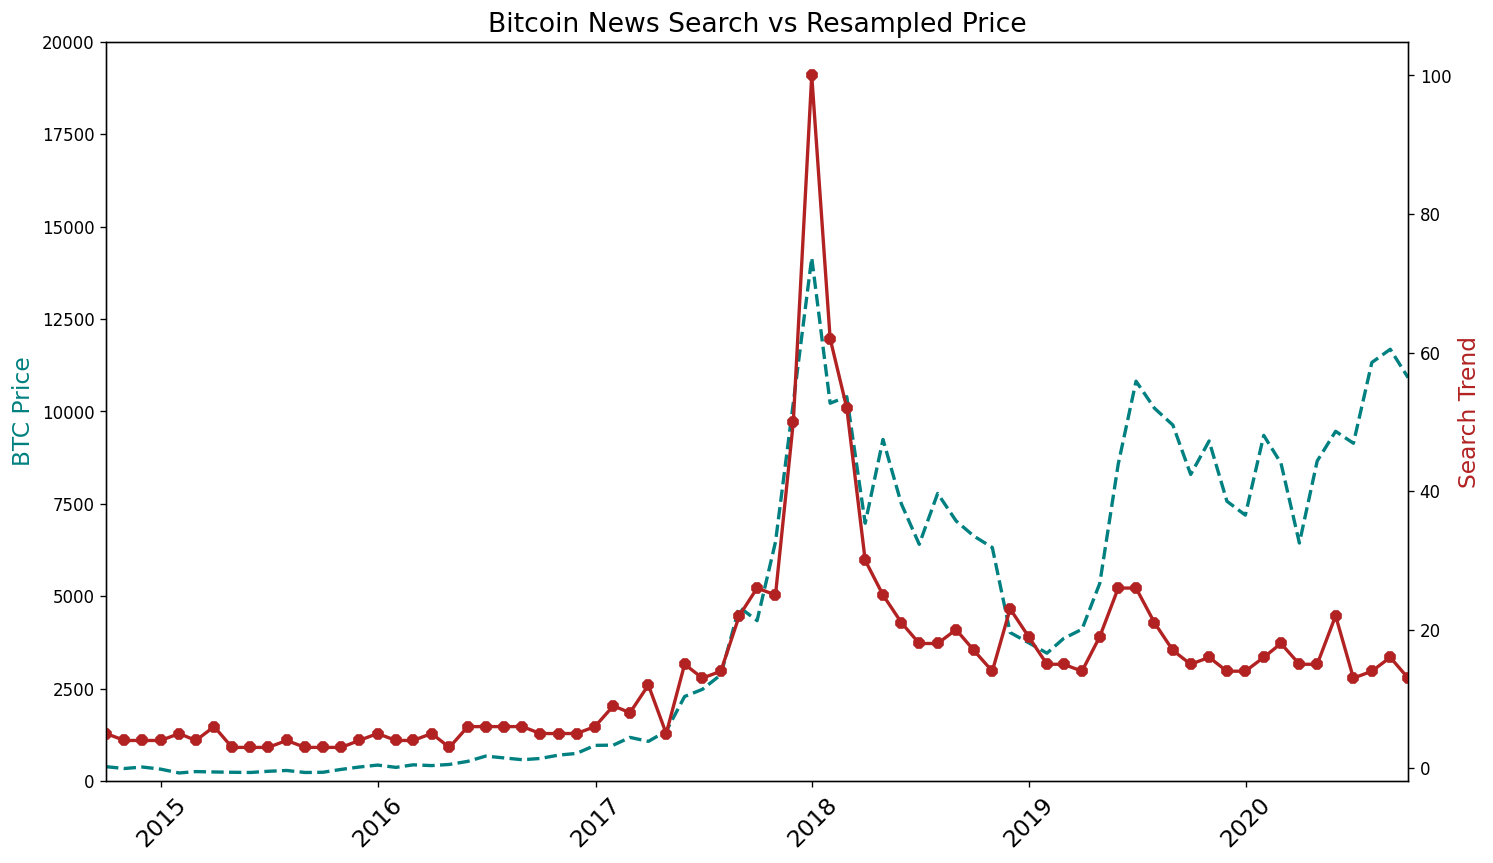

In [124]:
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Bitcoin News Search vs Resampled Price',fontsize=16)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price',color='teal',fontsize=14)
ax2.set_ylabel('Search Trend',color="firebrick",fontsize=14)
ax1.set_ylim([0, 20000])
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE,color='teal',linewidth=2,linestyle='dashed')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH,color="firebrick",linewidth=2,marker="8")

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

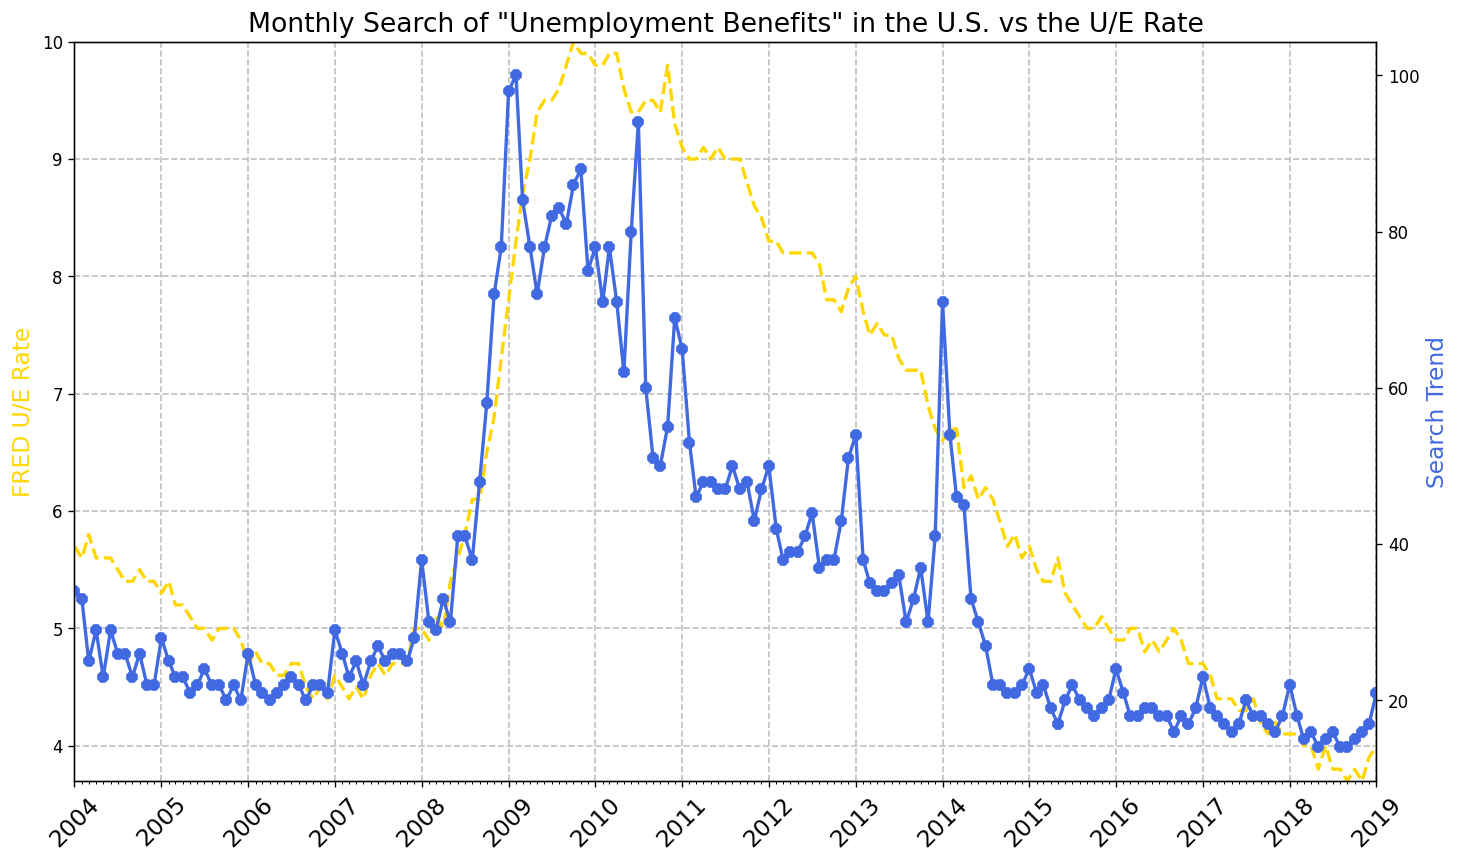

In [138]:
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate',fontsize=16)
plt.grid(color='silver', linestyle='dashed', linewidth=1)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate',color='gold',fontsize=14)
ax2.set_ylabel('Search Trend',color="royalblue",fontsize=14)
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_ylim([df_unemployment.UNRATE.min(), df_unemployment.UNRATE.max()])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,color='gold',linewidth=2,linestyle='dashed')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,color="royalblue",linewidth=2,marker="8")

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


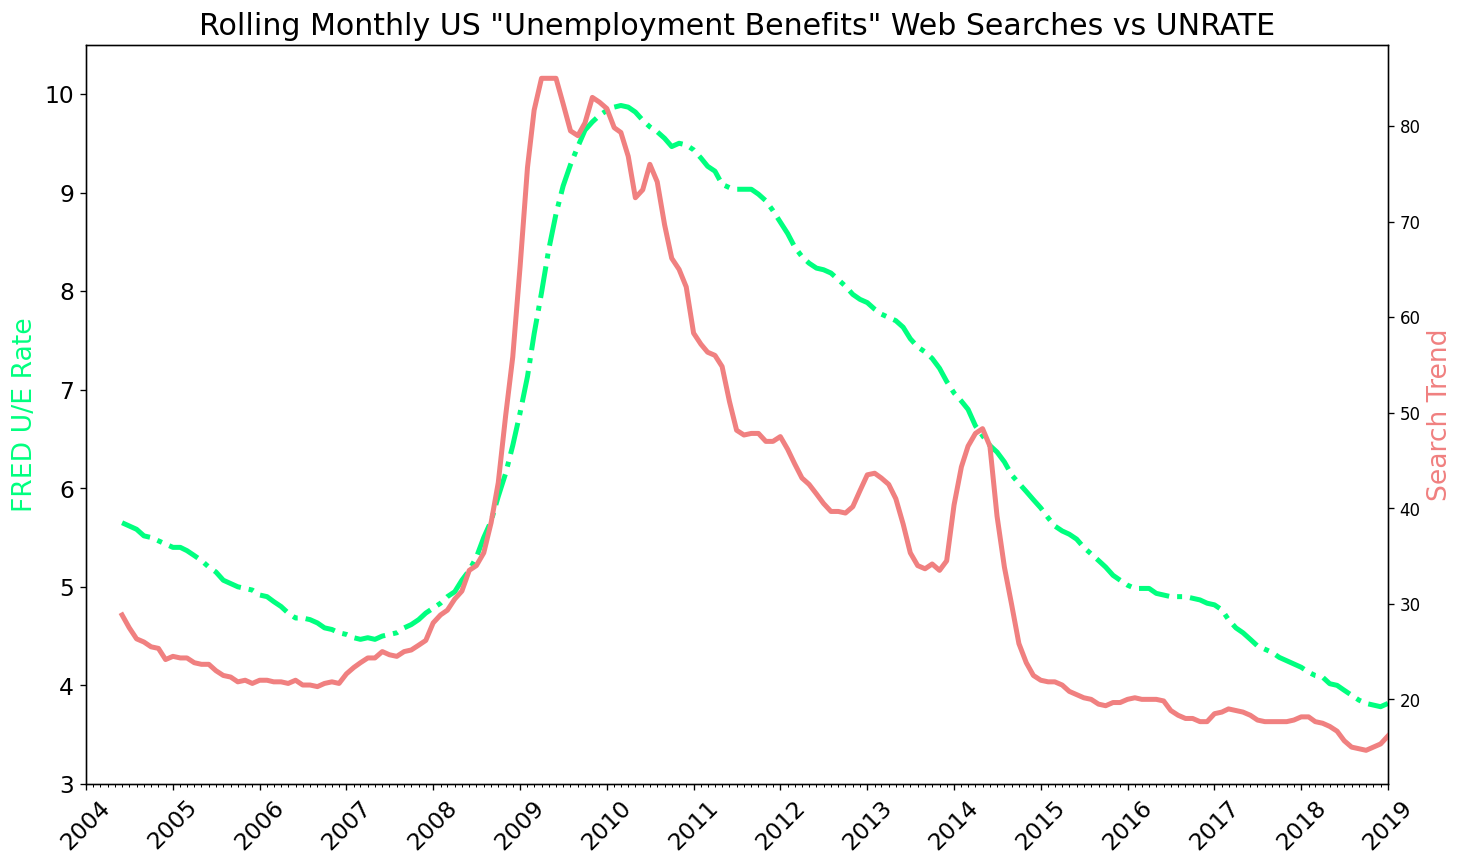

In [144]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

ax1.set_ylabel('FRED U/E Rate', color='springgreen', fontsize=16)
ax2.set_ylabel('Search Trend', color='lightcoral', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

# rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'springgreen', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'lightcoral', linewidth=3)

plt.show()

### Including 2020 in Unemployment Charts

In [145]:
df_unemployment2=pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')

In [147]:
df_unemployment2.MONTH=pd.to_datetime(df_unemployment2.MONTH)
df_unemployment2.MONTH

,MONTH
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01
...,...
195,2020-04-01
196,2020-05-01
197,2020-06-01
198,2020-07-01


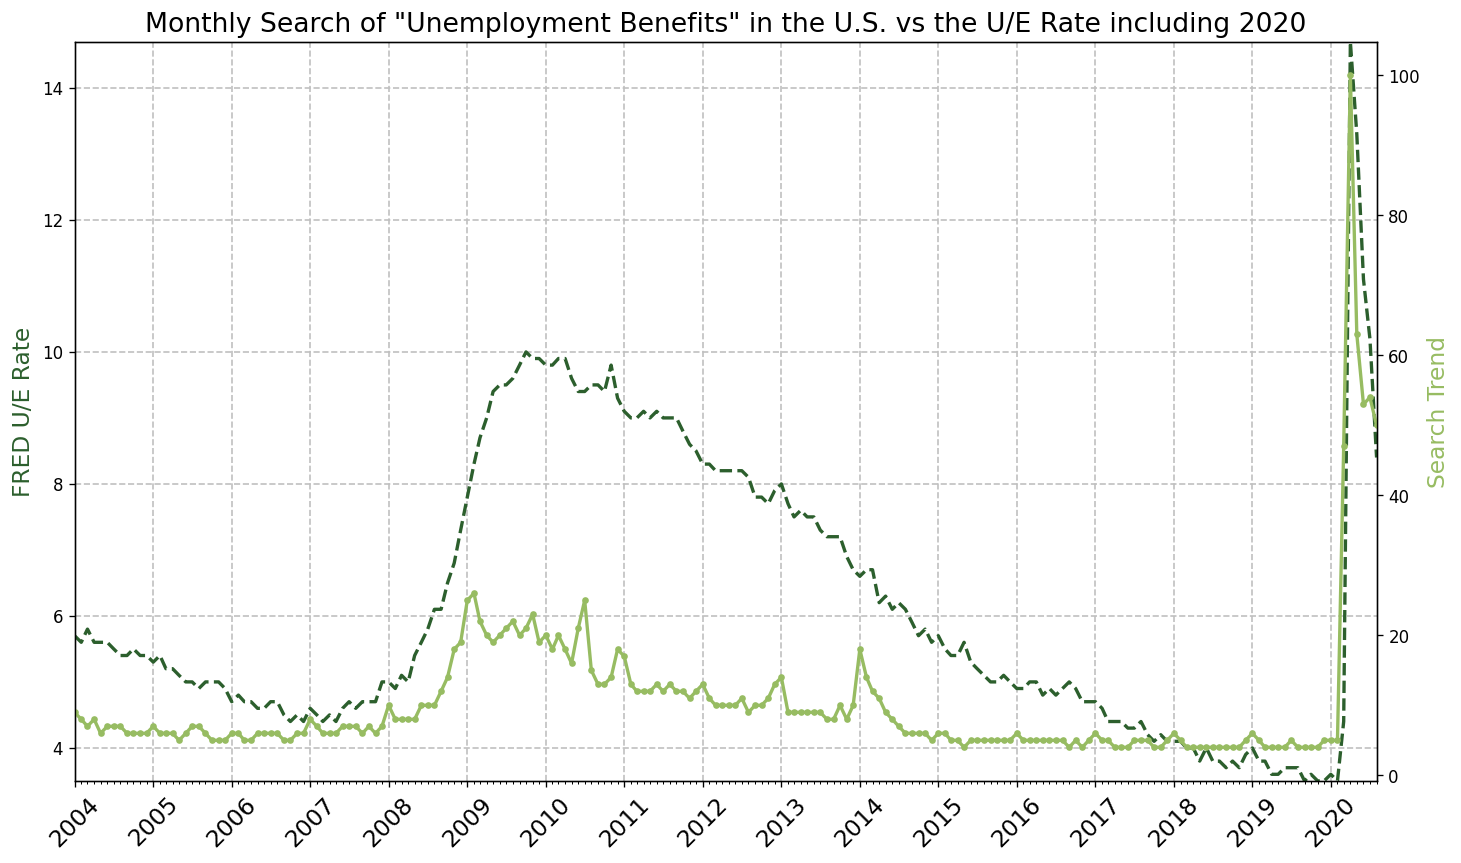

In [152]:
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate including 2020',fontsize=16)
plt.grid(color='silver', linestyle='dashed', linewidth=1)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate',color='#2C5F2D',fontsize=14)
ax2.set_ylabel('Search Trend',color="#97BC62",fontsize=14)
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_ylim([df_unemployment2.UNRATE.min(), df_unemployment2.UNRATE.max()])
ax1.set_xlim([df_unemployment2.MONTH.min(), df_unemployment2.MONTH.max()])
ax1.plot(df_unemployment2.MONTH, df_unemployment2.UNRATE,color='#2C5F2D',linewidth=2,linestyle='dashed')
ax2.plot(df_unemployment2.MONTH, df_unemployment2.UE_BENEFITS_WEB_SEARCH,color="#97BC62",linewidth=2,marker=".")

plt.show()